<a href="https://colab.research.google.com/github/iuricimatec/depthmap/blob/main/calculateDisparityCMYK_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Profundidade da imagem" geralmente se refere ao número de bits usados para representar os valores de cor ou intensidade de cada pixel nuuma imagem digital. 

A profundidade da imagem determina o número de cores ou tons de cinza possíveis que podem ser representados em uma imagem, o que afeta a qualidade visual e os detalhes da imagem.

Para calcular a profundidade da imagem, você precisa saber o número de bits usados para representar cada pixel da imagem. As profundidades de imagem comuns incluem 8 bits, 16 bits e 24 bits, que representam 256, 65.536 e 16,7 milhões de cores possíveis, respectivamente.

A fórmula para calcular o número total de cores possíveis (ou níveis de intensidade) para uma determinada profundidade de imagem em bits é:

Número de cores = 2^(profundidade da imagem)

Por exemplo, para uma profundidade de imagem de 8 bits:

Número de cores = 2^8 = 256

Isso significa que uma imagem de 8 bits pode representar 256 cores ou tons de cinza diferentes.

Para uma profundidade de imagem de 16 bits:

Número de cores = 2^16 = 65.536

E para uma profundidade de imagem de 24 bits:

Número de cores = 2^24 = 16.777.216

Lembre-se de que as profundidades de imagem mais altas normalmente resultam em melhor qualidade de imagem e gradientes mais suaves, mas também requerem mais espaço de armazenamento e recursos computacionais. A profundidade de imagem apropriada a ser usada depende dos requisitos e restrições específicos da imagem e de seu uso pretendido.

In [20]:
import os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

from PIL import Image
from skimage import io, color

# to mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
print(stereo)

In [21]:
# Left image paths
pathL = '/content/gdrive/MyDrive/MCTI/dataset/camera1/new/'
# Right image paths
pathR = '/content/gdrive/MyDrive/MCTI/dataset/camera2/new/'

filenameL = pathL + '0101.png'
filenameR = pathR + '0101.png'

In [22]:
# reading images as RGB returns an error in the retrieve proecdure, disparity.
# reading CMYK from file has only 3 instead of 4 
imgL = cv.imread(filenameL)
imgR = cv.imread(filenameR)


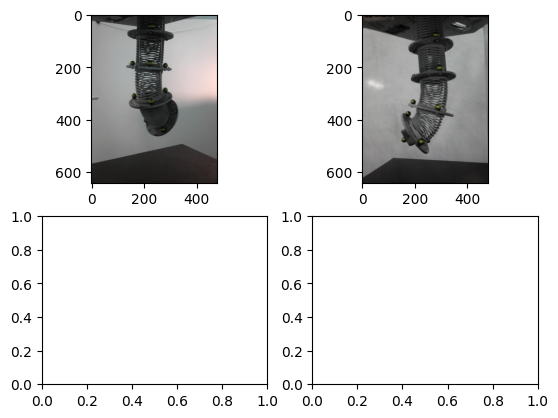

In [23]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(imgL)
axarr[0,1].imshow(imgR)


In [25]:
# Converting to CMYK system
bgrdash_L = imgL.astype(float)/255.
K_l = 1 - np.max(bgrdash_L, axis=2)
C_l = (1-bgrdash_L[...,2] - K_l)/(1-K_l)
M_l = (1-bgrdash_L[...,1] - K_l)/(1-K_l)
Y_l = (1-bgrdash_L[...,0] - K_l)/(1-K_l)
cmykL = (np.dstack((C_l,M_l,Y_l,K_l)) * 255).astype(np.uint8)

bgrdash_R = imgR.astype(float)/255.
K_r = 1 - np.max(bgrdash_R, axis=2)
C_r = (1-bgrdash_R[...,2] - K_r)/(1-K_r)
M_r = (1-bgrdash_R[...,1] - K_r)/(1-K_r)
Y_r = (1-bgrdash_R[...,0] - K_r)/(1-K_r)
cmykR = (np.dstack((C_r,M_r,Y_r,K_r)) * 255).astype(np.uint8)

<ipython-input-25-7015ea2b36f3>:4: RuntimeWarning: invalid value encountered in true_divide
  C_l = (1-bgrdash_L[...,2] - K_l)/(1-K_l)
<ipython-input-25-7015ea2b36f3>:5: RuntimeWarning: invalid value encountered in true_divide
  M_l = (1-bgrdash_L[...,1] - K_l)/(1-K_l)
<ipython-input-25-7015ea2b36f3>:6: RuntimeWarning: invalid value encountered in true_divide
  Y_l = (1-bgrdash_L[...,0] - K_l)/(1-K_l)
<ipython-input-25-7015ea2b36f3>:11: RuntimeWarning: invalid value encountered in true_divide
  C_r = (1-bgrdash_R[...,2] - K_r)/(1-K_r)
<ipython-input-25-7015ea2b36f3>:12: RuntimeWarning: invalid value encountered in true_divide
  M_r = (1-bgrdash_R[...,1] - K_r)/(1-K_r)
<ipython-input-25-7015ea2b36f3>:13: RuntimeWarning: invalid value encountered in true_divide
  Y_r = (1-bgrdash_R[...,0] - K_r)/(1-K_r)


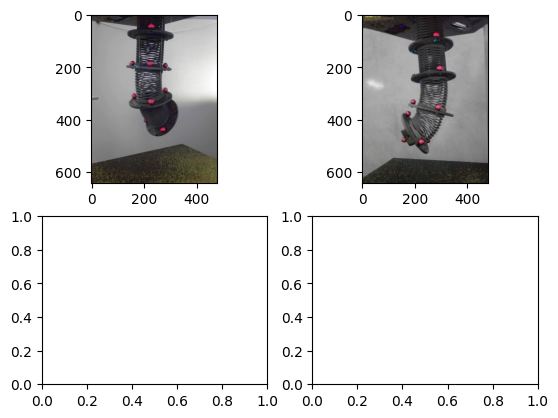

In [26]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(cmykL)
axarr[0,1].imshow(cmykR)


In [38]:
# get grayscale from BGR
grayL = cv.cvtColor(imgL, cv.COLOR_BGR2GRAY)
grayR = cv.cvtColor(imgR, cv.COLOR_BGR2GRAY)

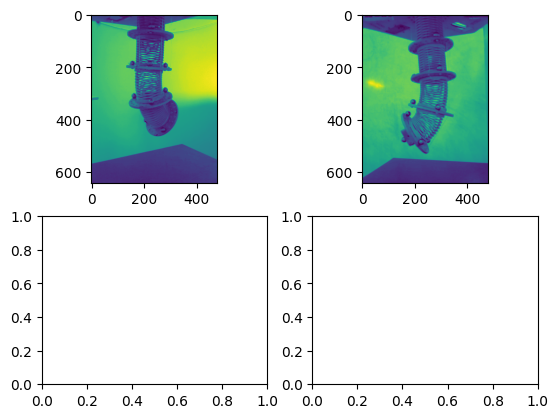

In [40]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(grayL)
axarr[0,1].imshow(grayR)

In [79]:
print('size: ', cmykL.size)
print('shape: ', cmykL.shape)

print("size: ", imgL.size)
print("shape: ", imgL.shape)

print("size: ", grayL.size)
print("shape: ", grayL.shape)

size:  1228800
shape:  (640, 480, 4)
size:  921600
shape:  (640, 480, 3)
size:  307200
shape:  (640, 480)


307200
(640, 480)
[[-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 ...
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]]


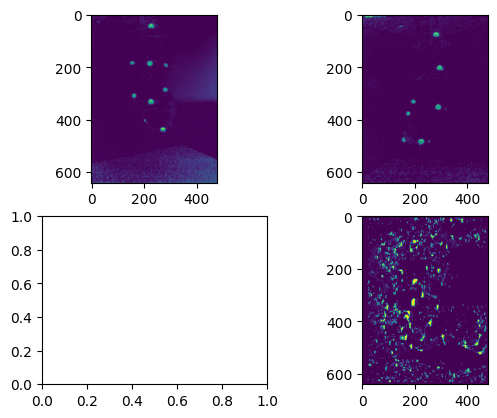

In [94]:
# Using ciane (C) from CMYK
monoL = cmykL[:,:,0]
monoR = cmykR[:,:,0]

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(monoL)
axarr[0,1].imshow(monoR)

disparity = stereo.compute(monoL, monoR)
print(disparity.size)
print(disparity.shape)
print(disparity)
plt.imshow(disparity)

307200
(640, 480)
[[-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 ...
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]]


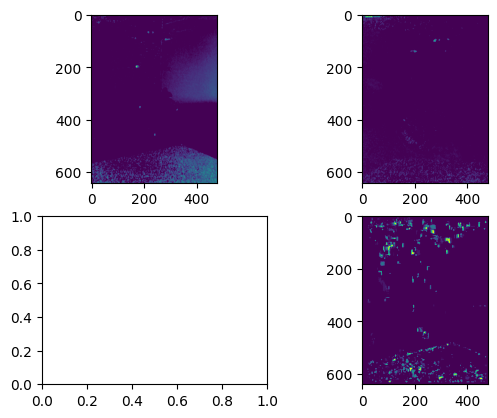

In [90]:
# using magenta (M) from CMYK
monoL = cmykL[:,:,1]
monoR = cmykR[:,:,1]

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(monoL)
axarr[0,1].imshow(monoR)

disparity = stereo.compute(monoL, monoR)
print(disparity.size)
print(disparity.shape)
print(disparity)
plt.imshow(disparity)

307200
(640, 480)
[[-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 ...
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]]


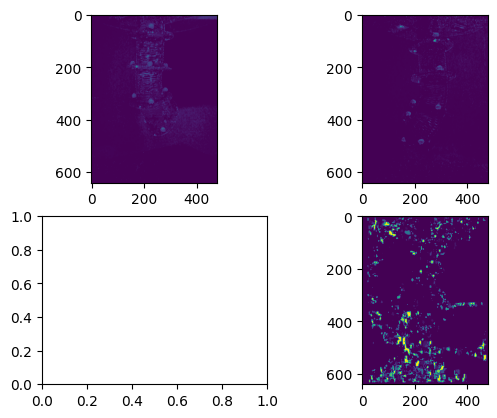

In [91]:
# using Yellow (Y) from CMYK
monoL = cmykL[:,:,2]
monoR = cmykR[:,:,2]

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(monoL)
axarr[0,1].imshow(monoR)

disparity = stereo.compute(monoL, monoR)
print(disparity.size)
print(disparity.shape)
print(disparity)
plt.imshow(disparity)

307200
(640, 480)
[[-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 ...
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]]


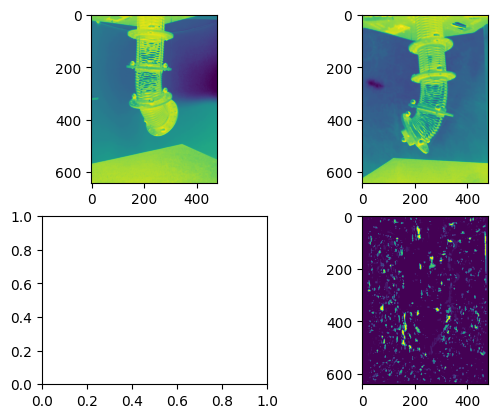

In [93]:
'# using key/black (K) from CMYK
monoL = cmykL[:,:,3]
monoR = cmykR[:,:,3]

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(monoL)
axarr[0,1].imshow(monoR)

disparity = stereo.compute(monoL, monoR)
print(disparity.size)
print(disparity.shape)
print(disparity)
plt.imshow(disparity)

In [95]:

# Step 2: Perform Fourier Transformation
f = np.fft.fft2(monoL)  # Compute 2D Fourier transform
fshift = np.fft.fftshift(f)  # Shift the zero frequency components to the center

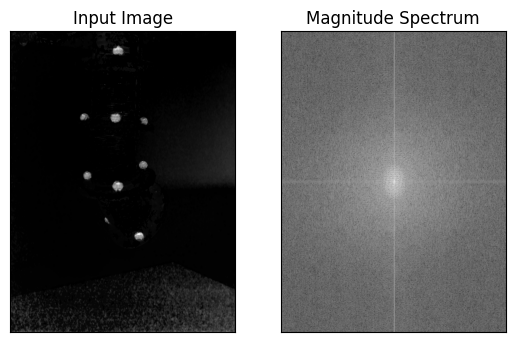

In [102]:

# Step 3: Visualize the Fourier Transform
magnitude_spectrum = 20 * np.log(np.abs(fshift))  # Compute magnitude spectrum for visualization
plt.subplot(121), plt.imshow(monoL, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

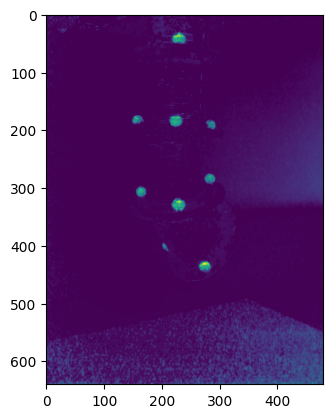

In [103]:

# Step 4: Apply Inverse Fourier Transformation (Optional)
f_ishift = np.fft.ifftshift(fshift)  # Shift back the zero frequency components
reconstructed_image = np.fft.ifft2(f_ishift)  # Compute inverse 2D Fourier transform
reconstructed_image = np.abs(reconstructed_image).astype(np.uint8)  # Convert back to uint8
plt.imshow(reconstructed_image)

In [105]:
# Step 2: Perform Fourier Transformation
f = np.fft.fft2(monoR)  # Compute 2D Fourier transform
fshift = np.fft.fftshift(f)  # Shift the zero frequency components to the center


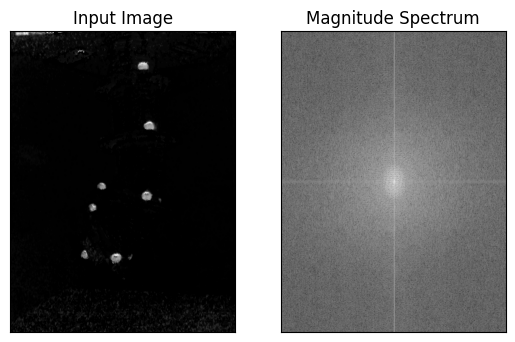

In [104]:
# Step 3: Visualize the Fourier Transform
magnitude_spectrum = 20 * np.log(np.abs(fshift))  # Compute magnitude spectrum for visualization
plt.subplot(121), plt.imshow(monoR, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

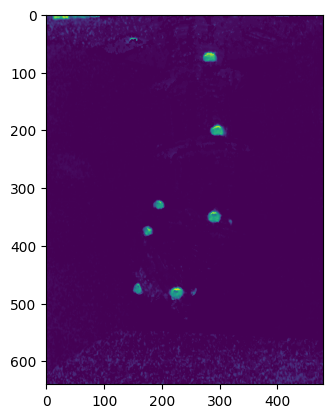

In [106]:
# Step 4: Apply Inverse Fourier Transformation (Optional)
f_ishift = np.fft.ifftshift(fshift)  # Shift back the zero frequency components
reconstructed_imageR = np.fft.ifft2(f_ishift)  # Compute inverse 2D Fourier transform
reconstructed_imageR = np.abs(reconstructed_imageR).astype(np.uint8)  # Convert back to uint8
plt.imshow(reconstructed_imageR)

307200
(640, 480)
[[-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 ...
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]]


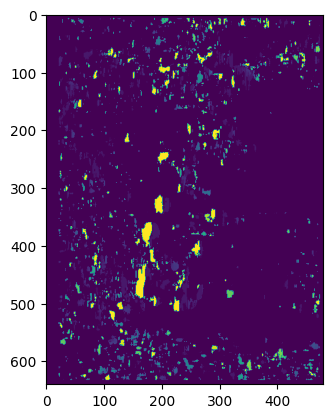

In [107]:
disparity = stereo.compute(reconstructed_image, reconstructed_imageR)
print(disparity.size)
print(disparity.shape)
print(disparity)
plt.imshow(disparity)